## **Introduction**: 

* The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives,which the report also correlates with various life factors.

* The rankings of national happiness are based on a Cantril ladder survey. Nationally representative samples of respondents are asked to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale. The report correlates the results with various life factors.

* In the reports, experts in fields including economics, psychology, survey analysis, and national statistics, describe how measurements of well-being can be used effectively to assess the progress of nations, and other topics. Each report is organized by chapters that delve deeper into issues relating to happiness, including mental illness, the objective benefits of happiness, the importance of ethics, policy implications, and links with the Organisation for Economic Co-operation and Development's (OECD) approach to measuring subjective well-being and other international and national efforts.

In [1]:
# for some basic operations
import numpy as np 
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline


# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from bubbly.bubbly import bubbleplot
import plotly.express as px

In [2]:
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')

df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [4]:
df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [5]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

## Feature Engineering 

In [6]:
df = pd.merge(df_2019, df_2016[['Country', 'Region']], left_on='Country or region', right_on='Country', how='left').drop('Country', axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
 9   Region                        148 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 13.4+ KB


In [7]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Western Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Western Europe


In [8]:
cols = list(df.columns.values)

df = df[['Overall rank',
 'Country or region',
 'Region',        
 'Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']]

df.rename(columns={'Country or region': 'Country'}, inplace=True)

df.head()

,Overall rank,Country,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,Western Europe,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,Western Europe,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,Western Europe,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,Western Europe,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,Western Europe,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [9]:
df['Region'].unique()

array(['Western Europe', 'Australia and New Zealand', 'North America',
       'Latin America and Caribbean', 'Middle East and Northern Africa',
       'Central and Eastern Europe', 'Eastern Asia', 'Southeastern Asia',
       nan, 'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [10]:
df[df['Region'].isnull()]

,Overall rank,Country,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
38,39,Trinidad & Tobago,NaN,6.192,1.231,1.477,0.713,0.489,0.185,0.016
63,64,Northern Cyprus,NaN,5.718,1.263,1.252,1.042,0.417,0.191,0.162
83,84,North Macedonia,NaN,5.274,0.983,1.294,0.838,0.345,0.185,0.034
119,120,Gambia,NaN,4.516,0.308,0.939,0.428,0.382,0.269,0.167
122,123,Mozambique,NaN,4.466,0.204,0.986,0.390,0.494,0.197,0.138
134,135,Swaziland,NaN,4.212,0.811,1.149,0.000,0.313,0.074,0.135
143,144,Lesotho,NaN,3.802,0.489,1.169,0.168,0.359,0.107,0.093
154,155,Central African Republic,NaN,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [11]:
def fill_nan(country, region):
    
    index = df[df['Country'] == country].index
    df.loc[index, ['Region']] = region
    
    return    

In [12]:
fill_nan('Trinidad & Tobago', 'Latin America and Caribbean')
fill_nan('Northern Cyprus', 'Middle East and Northern Africa')
fill_nan('North Macedonia', 'Central and Eastern Europe')
fill_nan('Gambia', 'Sub-Saharan Africa')
fill_nan('Mozambique', 'Sub-Saharan Africa')
fill_nan('Swaziland', 'Sub-Saharan Africa')
fill_nan('Lesotho', 'Sub-Saharan Africa')
fill_nan('Central African Republic', 'Sub-Saharan Africa')

In [13]:
df.isnull().sum()

Overall rank                    0
Country                         0
Region                          0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

## Exploratory Data Anlysis

In [14]:
data = dict(
        type = 'choropleth',
        locations = df['Country'],
        colorscale = 'viridis',
        reversescale = True,
        locationmode = 'country names' ,
        z = df['Score'],
        text = df[['Country', 'Overall rank']],
        colorbar = {'title' : 'Happiness Score'},
      )

In [15]:
layout = dict(
    title = 'World Happiness Report 2019',
    geo = dict(
        showframe = False,
        projection = {'type':'equirectangular'}
    )
)

In [16]:
choromap = go.Figure(data = [data],layout = layout)

iplot(choromap,validate=False)

In [17]:
region_wise = df.groupby('Region')['Score'].mean().sort_values(ascending=False)
region_wise

Region
Australia and New Zealand          7.267500
North America                      7.085000
Western Europe                     6.898400
Latin America and Caribbean        5.954429
Eastern Asia                       5.688833
Central and Eastern Europe         5.561517
Southeastern Asia                  5.273667
Middle East and Northern Africa    5.261050
Southern Asia                      4.526857
Sub-Saharan Africa                 4.300050
Name: Score, dtype: float64

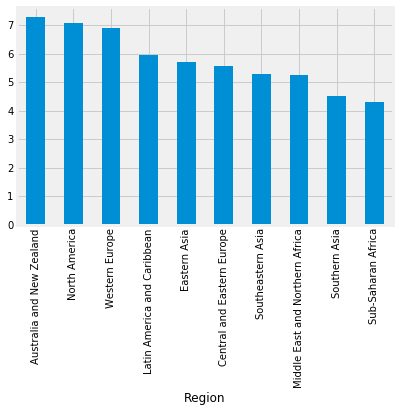

In [18]:
region_wise.plot(kind='bar')

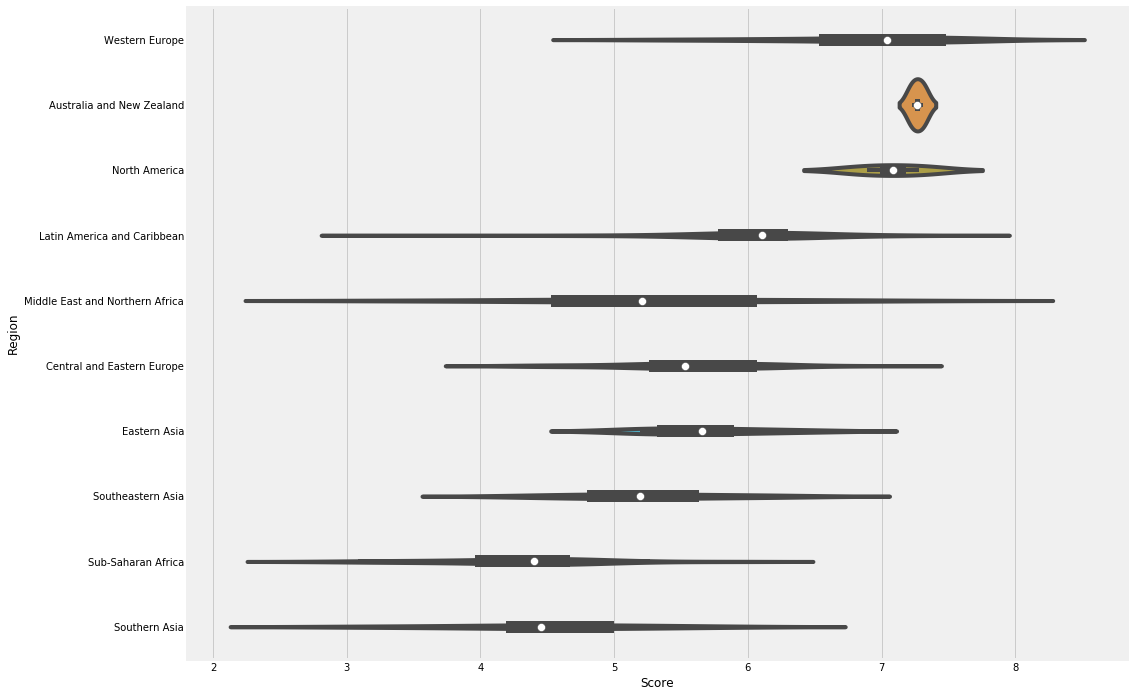

In [19]:
# happiness score vs continents

plt.rcParams['figure.figsize'] = (15, 12)
sns.violinplot(df['Score'], df['Region'])

## Correlations Between the Data

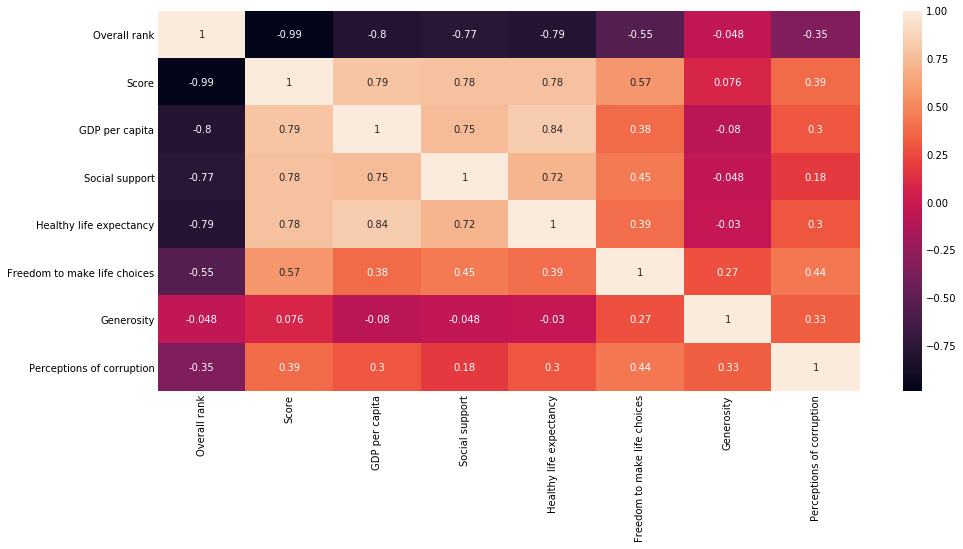

In [20]:
plt.figure(figsize=(14,7))

sns.heatmap(df.corr(), annot=True)

> In the above Heat Map we can see that Happiness Score is very highly correlated with Economy, Health, and Social support and somewhat related with Freedom also but has very low relation with Generosity and Trust in Government in average case.

## Correlations for Western Europe

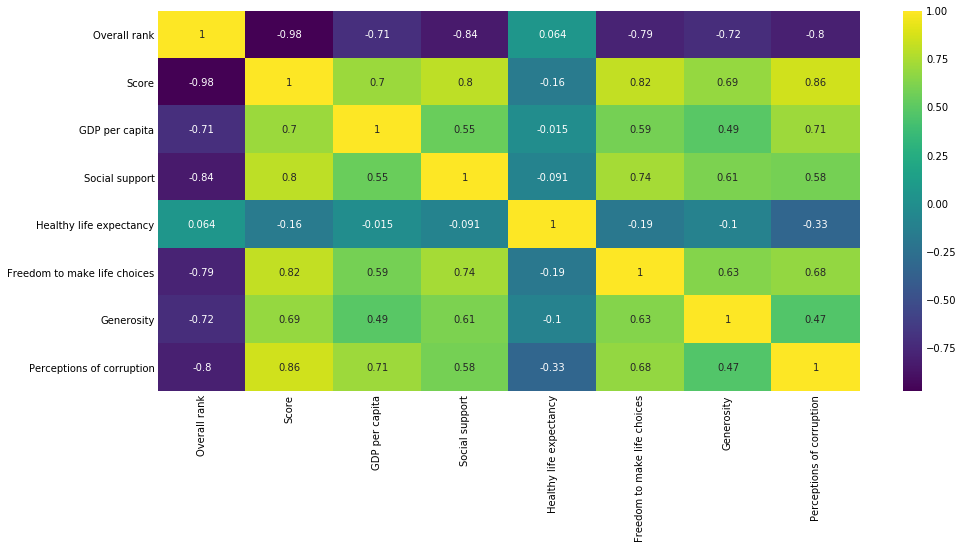

In [21]:
plt.figure(figsize=(14,7))

d = df[df['Region'] == 'Western Europe']
sns.heatmap(d.corr(), cmap = 'viridis', annot = True)


> The Heat Map particularly for Europe has one more thing to add apart from Social Support, Freedom, Economy, Generosity, It is also highly correlated with Trust in Government. It has negative correlations only with Health.

> The European Region is the Happiest Region so far.

## Correlations for Eastern Asia

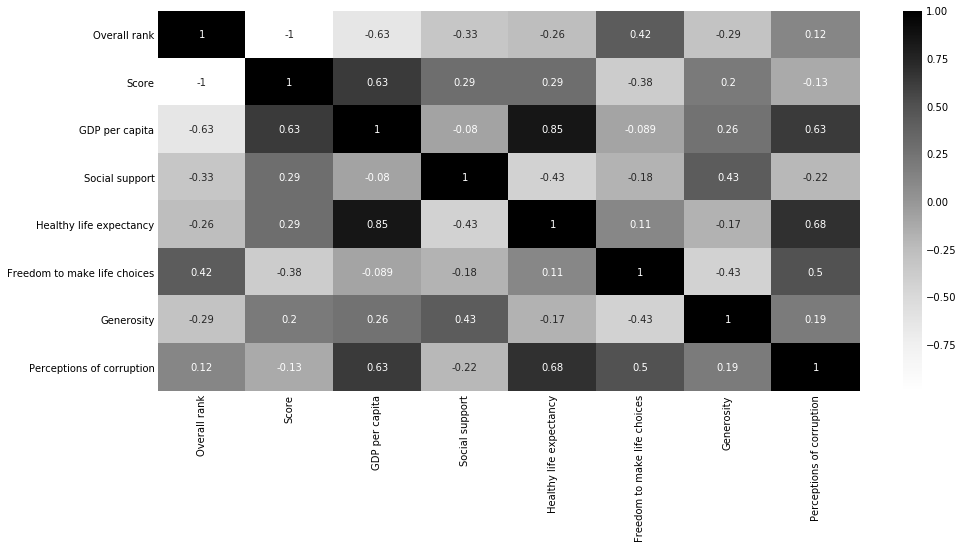

In [22]:
plt.figure(figsize=(14,7))

d = df.loc[lambda df: df['Region'] == 'Eastern Asia']
sns.heatmap(d.corr(), cmap= 'Greys', annot = True)


> Here, The situation gets worsened as the Correlation is low for many important factors such as Economy, Social Support, Health and Generosity which makes the situation very critical. It has Negative correlations with Freedom and Trust in government.

## Correlations for North America

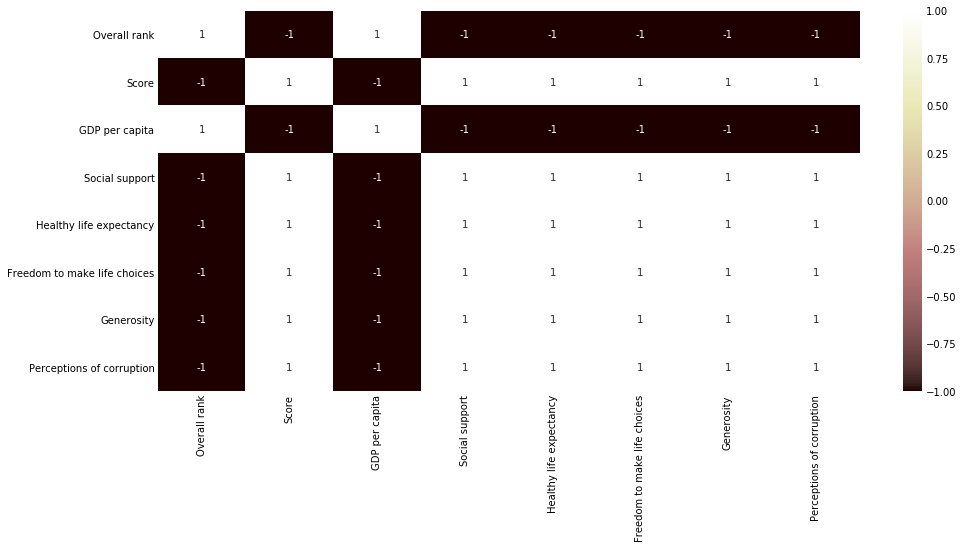

In [23]:
plt.figure(figsize=(14,7))

d = df.loc[lambda df: df['Region'] == 'North America']
sns.heatmap(d.corr(), cmap= 'pink', annot = True)

> Everything is highly correlated to the Happiness in America. Amongst so many countries of the world. Being a very large country also America is still able to keep their people happy. America stands at position number 19 amongst the Happiness Rankings for the World.

## Correlations for Middle East and Northern Africa

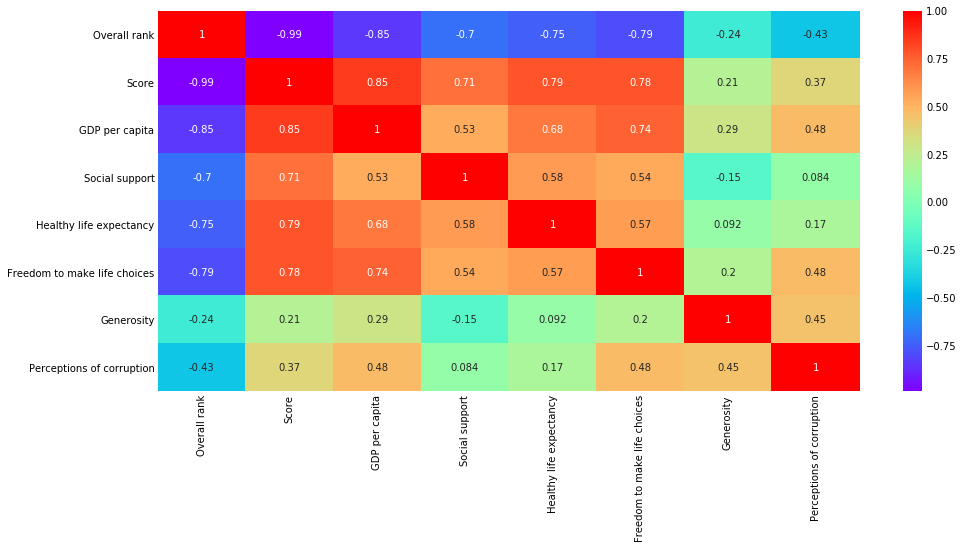

In [24]:
plt.figure(figsize=(14,7))

d = df.loc[lambda df: df['Region'] == 'Middle East and Northern Africa']
sns.heatmap(d.corr(), cmap= 'rainbow', annot = True)

> The correlations are quite good with almost all the important factors being highly correlated with Happiness. Social Support is the most important factor as it is the most important factor for happiness in this region.

## Correlations for Sub-Saharan Africa

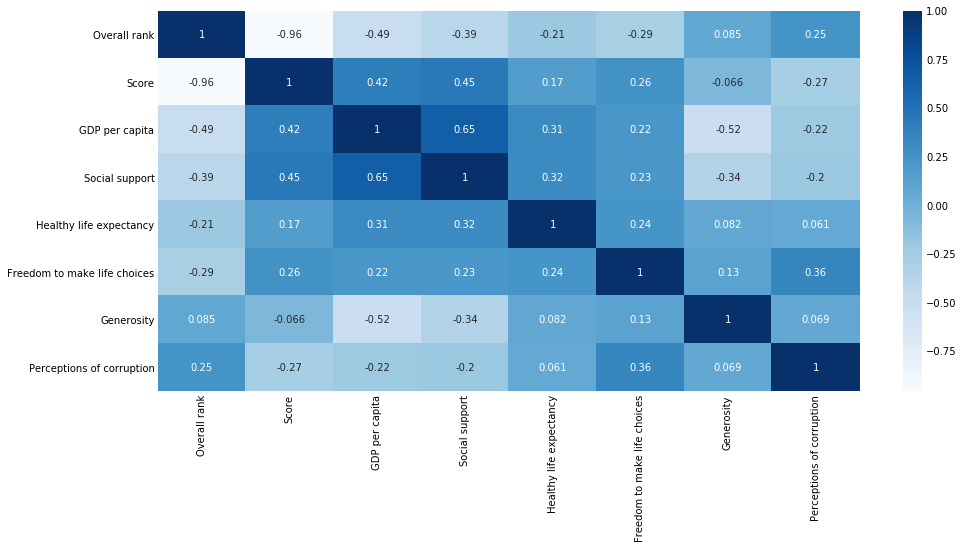

In [25]:
plt.figure(figsize=(14,7))

d = df.loc[lambda df: df['Region'] == 'Sub-Saharan Africa']
sns.heatmap(d.corr(), cmap= 'Blues', annot = True)

> The Situations are very bad for Sub-Saharan Region as it is the unhappiest region in the world. The correlations with Happiness Score are very low for features such as Generosity, Social Support, Freedom etc. Almost all of the features are having less than 0.5 correlation which is very bad.

##  Correlations for Southern Asia

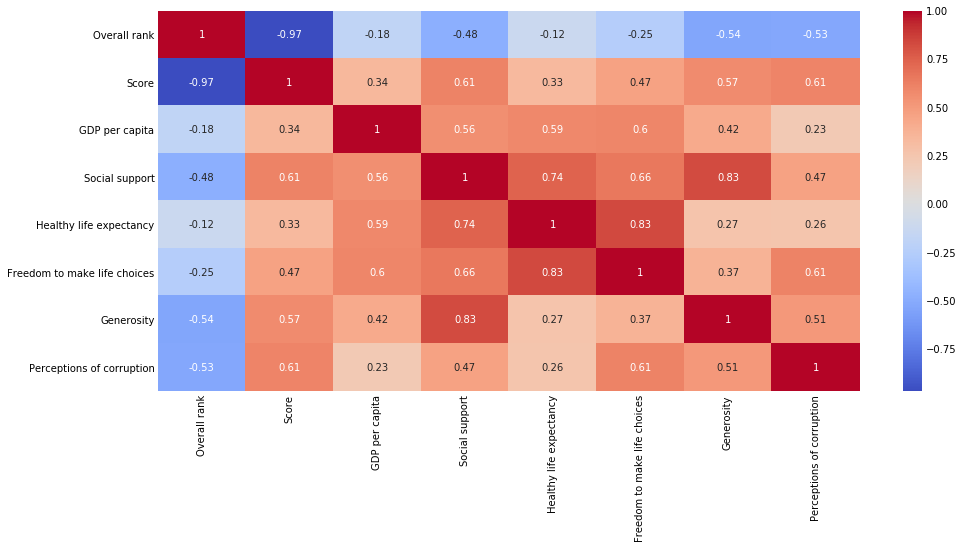

In [26]:
plt.figure(figsize=(14,7))

d = df.loc[lambda df: df['Region'] == 'Southern Asia']
sns.heatmap(d.corr(), cmap= 'coolwarm', annot = True)

> The correlations are below par with Social Support, Generosity and Trust in government. It has very low correlations with GDP, Health and Freedom which makes the situation very critical. Southen Asia is the most unhappiest region in the world after Sub-Saharan Africa.India in spite of being the largest democracy in the world ranks very high in the World Happiness Index.

## Bubble Charts

In [27]:
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = df, x_column = 'Score', y_column = 'Generosity', 
    bubble_column = 'Country', size_column = 'GDP per capita', color_column = 'Region', 
    x_title = "Happiness Score", y_title = "Generosity", title = 'Happiness vs Generosity vs Economy',
    x_logscale = False, scale_bubble = 1, height = 650)

py.iplot(figure, config={'scrollzoom': True})

In [28]:
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = df, x_column = 'Score', y_column = 'Perceptions of corruption', 
    bubble_column = 'Country', size_column = 'GDP per capita', color_column = 'Region', 
    x_title = "Happiness Score", y_title = "Trust", title = 'Happiness vs Trust vs Economy',
    x_logscale = False, scale_bubble = 1, height = 650)

py.iplot(figure, config={'scrollzoom': True})

In [29]:
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = df, x_column = 'Score', y_column = 'Healthy life expectancy', 
    bubble_column = 'Country', size_column = 'GDP per capita', color_column = 'Region', 
    x_title = "Happiness Score", y_title = "Health", title = 'Happiness vs Health vs Economy',
    x_logscale = False, scale_bubble = 1, height = 650)

py.iplot(figure, config={'scrollzoom': True})

In [30]:
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = df, x_column = 'Score', y_column = 'Social support', 
    bubble_column = 'Country', size_column = 'GDP per capita', color_column = 'Region', 
    x_title = "Happiness Score", y_title = "Social Support", title = 'Happiness vs Social support vs Economy',
    x_logscale = False, scale_bubble = 1, height = 650)

py.iplot(figure, config={'scrollzoom': True})

> Bubble plot to depict the relation between the Happiness Scores vs Social Support where size of the bubbles is represented by the Economy and the color of the bubbles is represented by the Different Regions of the World.

* It is Quite Visible that as the Social Support ratings increases the Happiness Score increases. So, We can say that they have a direct relationship between them.

* Also, European Countries and  Austrelia are the Happiest Regions. After America.

* There is not even a single country in American Region with low Happiness Index.

* Asian and African countries suffer with some serious issues, that is why none of the Asian orr African Country stands at a good position in terms of Happiness Index.

* Some Countries in Middle East are Happy while some are Unhappy.

## Bullet Chart

In [31]:
import plotly.figure_factory as ff

data = (
  {"label": "Happiness", "sublabel":"score",
   "range": [5, 6, 8], "performance": [5.5, 6.5], "point": [7]},
  {"label": "Economy", "sublabel": "score", "range": [0, 1, 2],
   "performance": [1, 1.5], "sublabel":"score","point": [1.5]},
  {"label": "Social","sublabel":"score", "range": [0, 1, 2],
   "performance": [1, 1.5],"sublabel":"score", "point": [1.3]},
  {"label": "Freedom","sublabel":"score", "range": [0, 0.3, 0.6],
   "performance": [0.3, 0.4],"sublabel":"score", "point": [0.5]},
  {"label": "Trust", "sublabel":"score","range": [0, 0.2, 0.5],
   "performance": [0.3, 0.4], "point": [0.4]}
)



fig = ff.create_bullet(
    data, titles='label', subtitles='sublabel', markers='point',
    measures='performance', ranges='range', orientation='v',
)
py.iplot(fig, filename='bullet chart from dict')

> Bullet Chart to Represent the Range for some of the most Important Attributes given in the data. We have taken Happiness, Economy, Freedom, and Social Support for analysis of their range.

* If the values for the given attributes lie in the Dark Blue Region then it is in the critical region.

* If the values for the given attributes lie in the light blue region then is is in good condition.

* If the values for the given attributes lie above or near the diamond then is in the best state or condition.

* White Regions are depicting the Maxima that could be achieved.

In [32]:
d2019 = df['Region'].value_counts()

label_d2019 = d2019.index
size_d2019 = d2019.values


colors = ['aqua', 'gold', 'yellow', 'crimson', 'magenta']

trace = go.Pie(
         labels = label_d2019, values = size_d2019, marker = dict(colors = colors), name = '2019', hole = 0.3)

data = [trace]

layout1 = go.Layout(
           title = 'Regions')

fig = go.Figure(data = data, layout = layout1)
py.iplot(fig)

> The Above pie chart depicts the Number of Countries from each Region, 

* There are only two countries from North America(USA and Canada), and Australia(Australia, and New Zealand) Regions.

* The highest number of countries are from Sub-Saharan and Central and Eastern Europe Regions with 40 and 29 countries respectively.

In [33]:
trace1 = [go.Choropleth(
               colorscale = 'Earth',
               locationmode = 'country names',
               locations = df['Country'],
               text = df['Country'], 
               z = df['Generosity'],
               )]

layout = dict(title = 'Generosity',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))


projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])


# Update Layout Object

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)


* Generosity is really low in Big Countries like Russia, China, and India but USA, Australia, and Canada has high ratings for generosity.

* Africa and South America have very low Generosity Scores in general.

## Top 10 Most Generous Countries

In [34]:
df[['Country', 'Generosity']].sort_values(by = 'Generosity',
                                                ascending = False).head(10)

,Country,Generosity
130,Myanmar,0.566
91,Indonesia,0.498
146,Haiti,0.419
21,Malta,0.375
120,Kenya,0.372
94,Bhutan,0.370
51,Thailand,0.359
3,Iceland,0.354
14,United Kingdom,0.348
10,Australia,0.332


In [35]:
df.columns

Index(['Overall rank', 'Country', 'Region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [36]:
trace1 = [go.Choropleth(
               colorscale = 'Cividis',
               locationmode = 'country names',
               locations = df['Country'],
               text = df['Country'], 
               z = df['Perceptions of corruption'],
               )]

layout = dict(title = 'Trust in Governance',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))


projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])


# Update Layout Object

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)


* Looks like there is no trust in government all round the world, except Norway, sweden, and Finland.

* Canada Saudi Arabia, Germany, United Kingdom, Somalia, Ireland, and Austrlia are also having good trust in the Governance of their Countries.

## Top 10 Countries with Trust in Government

In [37]:
df[['Country', 'Perceptions of corruption']].sort_values(by = 'Perceptions of corruption',
                                                                     ascending = False).head(10)

,Country,Perceptions of corruption
33,Singapore,0.453
151,Rwanda,0.411
1,Denmark,0.410
0,Finland,0.393
7,New Zealand,0.380
6,Sweden,0.373
5,Switzerland,0.343
2,Norway,0.341
13,Luxembourg,0.316
15,Ireland,0.310


In [38]:
trace1 = [go.Choropleth(
               colorscale = 'Portland',
               locationmode = 'country names',
               locations = df['Country'],
               text = df['Country'], 
               z = df['Social support'],
               )]

layout = dict(title = 'Social support',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))


projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])


# Update Layout Object

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)


* India and Iran have very low Social support comparatively. 

* All over the world Social support rate is really good.

* Central African Republic has the lowest Social support score in the world.

## Top 10 Countries in Social Support

In [39]:
df[['Country', 'Social support']].sort_values(by = 'Social support', ascending = False).head(10)

,Country,Social support
3,Iceland,1.624
0,Finland,1.587
2,Norway,1.582
1,Denmark,1.573
7,New Zealand,1.557
15,Ireland,1.553
10,Australia,1.548
86,Turkmenistan,1.538
14,United Kingdom,1.538
82,Mongolia,1.531


In [40]:
df.columns

Index(['Overall rank', 'Country', 'Region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [41]:
trace1 = [go.Choropleth(
               colorscale = 'Viridis',
               locationmode = 'country names',
               locations = df['Country'],
               text = df['Country'], 
               z = df['GDP per capita'],
               )]

layout = dict(title = 'GDP in 2019',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))


projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])


# Update Layout Object

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)




* America, Canada, Australia, Saudi Arabia, European Countries are the Leaders in the Economy and GDP. 

* Smaller Countries like Norway, Qatar, Luxembourg are having the best GDP rate in the world.

* Most of the African Countries are having very low GDP per capita rate.

* India, Pakistan, Myanmar are having very low GDP per capita in the Asian Regions.

## Top 10 Countries with Best Economy

In [42]:
df[['Country', 'GDP per capita']].sort_values(by = 'GDP per capita',
            ascending = False).head(10)

,Country,GDP per capita
28,Qatar,1.684
13,Luxembourg,1.609
33,Singapore,1.572
20,United Arab Emirates,1.503
50,Kuwait,1.500
15,Ireland,1.499
2,Norway,1.488
5,Switzerland,1.452
75,Hong Kong,1.438
18,United States,1.433


In [43]:

trace1 = [go.Choropleth(
               colorscale = 'Picnic',
               locationmode = 'country names',
               locations = df['Country'],
               text = df['Country'], 
               z = df['Freedom to make life choices'],
               )]

layout = dict(title = 'Freedom Index',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))


projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])


# Update Layout Object

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)


* Looks like Canada, Austrelia and Europe are the best places on Earth to live. They have high scores throughout. In this case also They are the Winners.

* Europe on Whole has a very high Freedom Index in comparison to other Coutries of the World.

* African Countries such as Sudan and Angola are having the lowsest Freedom Index in the World.

## Top 10 Most Freedom Oriented Countries

In [44]:
df[['Country', 'Freedom to make life choices']].sort_values(by = 'Freedom to make life choices', ascending = False).head(10)

,Country,Freedom to make life choices
40,Uzbekistan,0.631
108,Cambodia,0.609
2,Norway,0.603
20,United Arab Emirates,0.598
0,Finland,0.596
1,Denmark,0.592
3,Iceland,0.591
7,New Zealand,0.585
8,Canada,0.584
6,Sweden,0.574


In [45]:
df.columns

Index(['Overall rank', 'Country', 'Region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [46]:
trace1 = [go.Choropleth(
               colorscale = 'Electric',
               locationmode = 'country names',
               locations = df['Country'],
               text = df['Country'], 
               z = df['Overall rank'],
               )]

layout = dict(title = 'Happiness Rank',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))


projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]

annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])


# Update Layout Object

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)


## Top 10 Happiest Countries

In [47]:

df[['Country','Overall rank']].head(10)


,Country,Overall rank
0,Finland,1
1,Denmark,2
2,Norway,3
3,Iceland,4
4,Netherlands,5
5,Switzerland,6
6,Sweden,7
7,New Zealand,8
8,Canada,9
9,Austria,10
